<a href="https://colab.research.google.com/github/edilvolima/PPGEP---2024.2/blob/main/Tarefa_1_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Nearest Neighbors (KNN)

Este notebook implementa o algoritmo K-Nearest Neighbors (KNN) e o avalia em três conjuntos de dados diferentes. O KNN é um algoritmo de aprendizado de máquina supervisionado que pode ser usado para tarefas de classificação e regressão. Ele funciona encontrando os K pontos de dados mais próximos de um determinado ponto de teste e, em seguida, usando esses pontos para prever o rótulo ou o valor do ponto de teste.

## Etapas

### 1. Importando as bibliotecas

Primeiro, precisamos importar as bibliotecas necessárias. Usaremos `numpy` para operações numéricas, `pandas` para manipulação de dados, `scikit-learn` para carregar os conjuntos de dados, implementar o KNN, realizar o pré-processamento e calcular as métricas e `matplotlib` ou `seaborn` para visualização.

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification, load_iris, load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Implementando o KNN do zero

Em seguida, implementaremos o algoritmo KNN do zero. Começaremos definindo uma função para calcular a distância entre dois pontos. Usaremos a distância euclidiana, que é a distância em linha reta entre dois pontos.

In [2]:
def euclidean_distance(x1, x2):
  """Calcula a distância euclidiana entre dois pontos.

  Args:
    x1: O primeiro ponto.
    x2: O segundo ponto.

  Returns:
    A distância euclidiana entre os dois pontos.
  """
  return np.sqrt(np.sum((x1 - x2)**2))

Agora, implementaremos a função que encontra os K vizinhos mais próximos. Essa função recebe como entrada um conjunto de treinamento, um ponto de teste e o valor de K. Ela retorna os índices dos K pontos de dados mais próximos no conjunto de treinamento.

In [3]:
def get_k_neighbors(X_train, x_test, k):
  """Encontra os K vizinhos mais próximos de um ponto de teste no conjunto de treinamento.

  Args:
    X_train: O conjunto de treinamento.
    x_test: O ponto de teste.
    k: O número de vizinhos a serem encontrados.

  Returns:
    Os índices dos K pontos de dados mais próximos no conjunto de treinamento.
  """
  distances = []
  for i, x_train in enumerate(X_train):
    distance = euclidean_distance(x_train, x_test)
    distances.append((i, distance))
  distances.sort(key=lambda x: x[1])
  neighbors = [distances[i][0] for i in range(k)]
  return neighbors

Finalmente, implementaremos a função de classificação. Essa função recebe como entrada um conjunto de treinamento, um conjunto de teste e o valor de K. Ela retorna as previsões para os pontos de teste.

In [4]:
def predict(X_train, y_train, X_test, k):
  """Prevê os rótulos para os pontos de teste.

  Args:
    X_train: O conjunto de treinamento.
    y_train: Os rótulos para o conjunto de treinamento.
    X_test: O conjunto de teste.
    k: O número de vizinhos a serem considerados.

  Returns:
    As previsões para os pontos de teste.
  """
  predictions = []
  for x_test in X_test:
    neighbors = get_k_neighbors(X_train, x_test, k)
    labels = [y_train[i] for i in neighbors]
    prediction = max(set(labels), key=labels.count)
    predictions.append(prediction)
  return predictions

### 3. Implementando o KNN usando o scikit-learn

Agora, implementaremos o KNN usando a biblioteca `scikit-learn`. Isso servirá como um ponto de comparação para nossa implementação do zero.

In [5]:
def knn_scikit_learn(X_train, y_train, X_test, k):
  """Prevê os rótulos para os pontos de teste usando o KNeighborsClassifier do scikit-learn.

  Args:
    X_train: O conjunto de treinamento.
    y_train: Os rótulos para o conjunto de treinamento.
    X_test: O conjunto de teste.
    k: O número de vizinhos a serem considerados.

  Returns:
    As previsões para os pontos de teste.
  """
  model = KNeighborsClassifier(n_neighbors=k)
  model.fit(X_train, y_train)
  predictions = model.predict(X_test)
  return predictions

### 4. Carregando e pré-processando os dados

Agora, carregaremos os três conjuntos de dados: dados sintéticos, Iris e Wine. Também realizaremos o pré-processamento, que inclui a normalização dos dados usando o `StandardScaler` e a divisão dos dados em conjuntos de treinamento e teste.

In [6]:
def load_and_preprocess_data(dataset_name, test_size):
  """Carrega, normaliza e divide um conjunto de dados.

  Args:
    dataset_name: O nome do conjunto de dados ('synthetic', 'iris' ou 'wine').
    test_size: A proporção do conjunto de dados a ser incluída na divisão de teste.

  Returns:
    X_train, X_test, y_train, y_test: Os dados divididos e normalizados.
  """
  if dataset_name == 'synthetic':
    X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, random_state=42)
  elif dataset_name == 'iris':
    data = load_iris()
    X, y = data.data, data.target
  elif dataset_name == 'wine':
    data = load_wine()
    X, y = data.data, data.target
  else:
    raise ValueError("Conjunto de dados desconhecido.")

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

  return X_train, X_test, y_train, y_test

### 5. Executando os experimentos

Agora, executaremos os experimentos. Para cada conjunto de dados, variaremos K de 1 a 9 e o percentual de treinamento de 10% a 40%. Para cada combinação, treinaremos os modelos KNN (tanto a implementação do zero quanto a do `scikit-learn`) e calcularemos as métricas de avaliação.

In [7]:
def run_experiments(dataset_name, k_values, train_percentages):
  """Executa os experimentos KNN para um determinado conjunto de dados.

  Args:
    dataset_name: O nome do conjunto de dados.
    k_values: Uma lista de valores de K a serem testados.
    train_percentages: Uma lista de percentuais de treinamento a serem testados.

  Returns:
    Um DataFrame contendo os resultados dos experimentos.
  """
  results = []
  for train_percentage in train_percentages:
    test_size = 1 - train_percentage
    X_train, X_test, y_train, y_test = load_and_preprocess_data(dataset_name, test_size)
    for k in k_values:
      # Implementação do zero
      y_pred_zero = predict(X_train, y_train, X_test, k)
      accuracy_zero = accuracy_score(y_test, y_pred_zero)
      precision_zero = precision_score(y_test, y_pred_zero, average='weighted', zero_division=0)
      recall_zero = recall_score(y_test, y_pred_zero, average='weighted', zero_division=0)
      f1_zero = f1_score(y_test, y_pred_zero, average='weighted')
      cm_zero = confusion_matrix(y_test, y_pred_zero)

      # Implementação do scikit-learn
      y_pred_sklearn = knn_scikit_learn(X_train, y_train, X_test, k)
      accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
      precision_sklearn = precision_score(y_test, y_pred_sklearn, average='weighted', zero_division=0)
      recall_sklearn = recall_score(y_test, y_pred_sklearn, average='weighted', zero_division=0)
      f1_sklearn = f1_score(y_test, y_pred_sklearn, average='weighted')
      cm_sklearn = confusion_matrix(y_test, y_pred_sklearn)

      results.append({
          'dataset': dataset_name,
          'train_percentage': train_percentage,
          'k': k,
          'accuracy_zero': accuracy_zero,
          'precision_zero': precision_zero,
          'recall_zero': recall_zero,
          'f1_zero': f1_zero,
          'cm_zero': cm_zero,
          'accuracy_sklearn': accuracy_sklearn,
          'precision_sklearn': precision_sklearn,
          'recall_sklearn': recall_sklearn,
          'f1_sklearn': f1_sklearn,
          'cm_sklearn': cm_sklearn
      })

  return pd.DataFrame(results)

### 6. Registrando as métricas

Executaremos os experimentos e armazenaremos os resultados em DataFrames do `pandas`.

In [8]:
k_values = list(range(1, 10))
train_percentages = [0.1, 0.2, 0.3, 0.4]

synthetic_results = run_experiments('synthetic', k_values, train_percentages)
iris_results = run_experiments('iris', k_values, train_percentages)
wine_results = run_experiments('wine', k_values, train_percentages)

### 7. Análise e visualização

Agora, analisaremos e visualizaremos os resultados. Criaremos gráficos que mostram a performance (usando o F1-Score) em função de K e do percentual de treinamento para cada conjunto de dados. Também compararemos o desempenho da implementação do zero com a do `scikit-learn`.

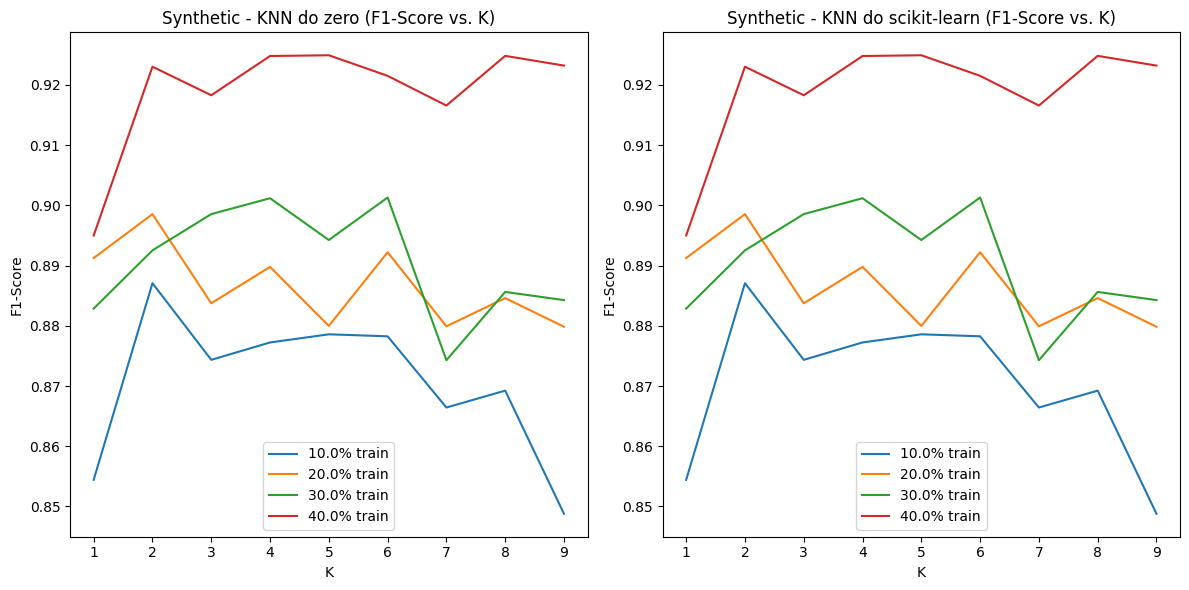

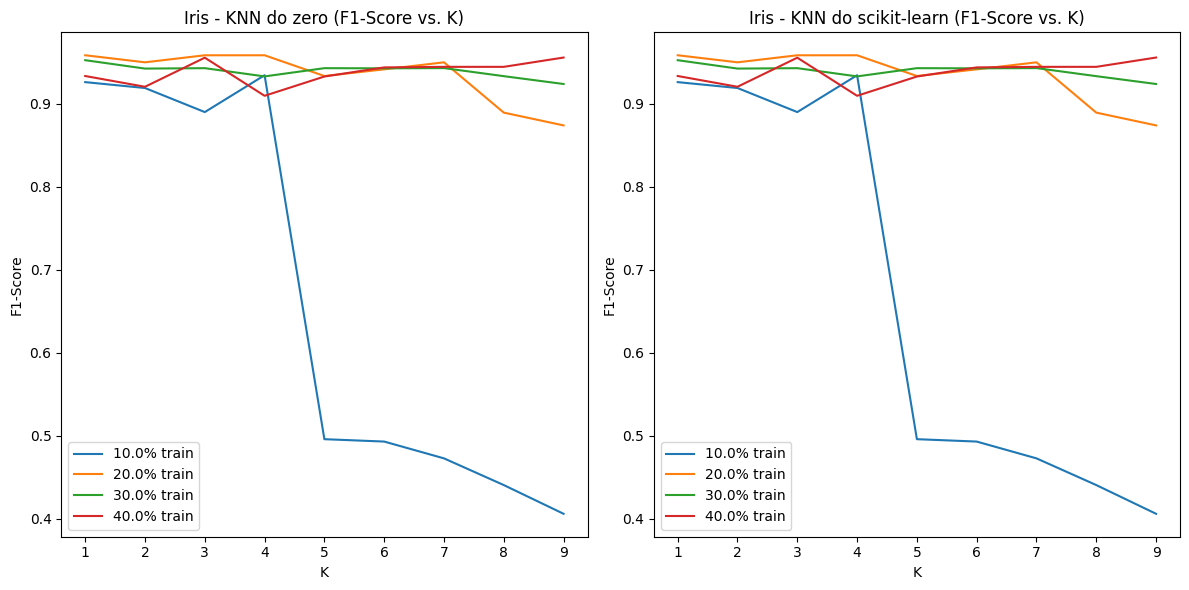

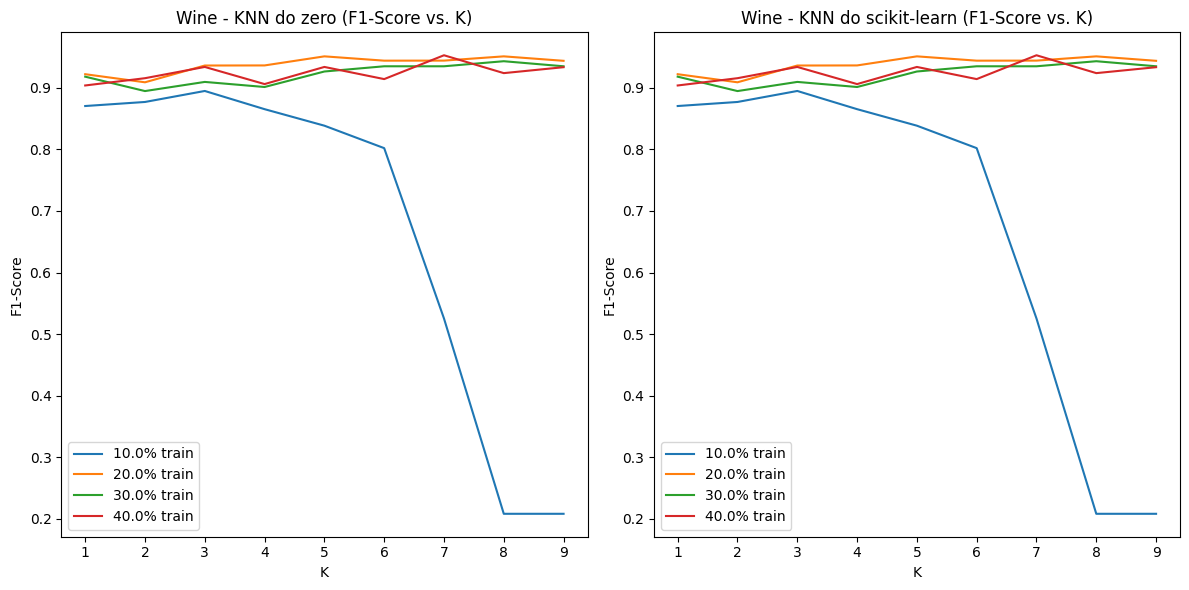

In [9]:
def plot_results(results, dataset_name):
  """Plota os resultados dos experimentos KNN.

  Args:
    results: O DataFrame contendo os resultados dos experimentos.
    dataset_name: O nome do conjunto de dados.
  """
  plt.figure(figsize=(12, 6))

  plt.subplot(1, 2, 1)
  for train_percentage in results['train_percentage'].unique():
    subset = results[results['train_percentage'] == train_percentage]
    plt.plot(subset['k'], subset['f1_zero'], label=f'{train_percentage * 100}% train')
  plt.title(f'{dataset_name} - KNN do zero (F1-Score vs. K)')
  plt.xlabel('K')
  plt.ylabel('F1-Score')
  plt.legend()

  plt.subplot(1, 2, 2)
  for train_percentage in results['train_percentage'].unique():
    subset = results[results['train_percentage'] == train_percentage]
    plt.plot(subset['k'], subset['f1_sklearn'], label=f'{train_percentage * 100}% train')
  plt.title(f'{dataset_name} - KNN do scikit-learn (F1-Score vs. K)')
  plt.xlabel('K')
  plt.ylabel('F1-Score')
  plt.legend()

  plt.tight_layout()
  plt.show()

plot_results(synthetic_results, 'Synthetic')
plot_results(iris_results, 'Iris')
plot_results(wine_results, 'Wine')

### 8. Discussão

Agora, discutiremos os resultados. Abordaremos os seguintes pontos:

*   Como o valor de K afeta a performance do modelo?
*   Como o tamanho do conjunto de treinamento afeta a performance?
*   Quais são as diferenças de performance entre os três conjuntos de dados?
*   Quais são as vantagens e desvantagens da implementação própria em comparação com a do scikit-learn?negrito

#### Como o valor de K afeta a performance do modelo?

O valor de K, que representa o número de vizinhos a serem considerados na classificação, tem um impacto significativo na performance do modelo KNN. A escolha de K é um equilíbrio entre viés e variância. Aqui está como o valor de K afeta a performance:

*   **K pequeno (por exemplo, K=1):**
    *   **Baixo viés:** O modelo captura os padrões locais nos dados com muita precisão. A fronteira de decisão é muito flexível e pode se ajustar bem aos dados de treinamento.
    *   **Alta variância:** O modelo é muito sensível a ruídos nos dados de treinamento. Uma pequena alteração nos dados pode levar a uma alteração significativa nas previsões. Isso pode levar a overfitting, onde o modelo tem um bom desempenho nos dados de treinamento, mas um desempenho ruim nos dados de teste.
    *   **Fronteira de decisão complexa:** A fronteira de decisão pode ser muito irregular e complexa, levando a overfitting.

*   **K grande (por exemplo, K=9):**
    *   **Alto viés:** O modelo faz mais generalizações e não captura os padrões locais nos dados. A fronteira de decisão é mais suave.
    *   **Baixa variância:** O modelo é menos sensível a ruídos nos dados de treinamento. Pequenas alterações nos dados não levam a alterações significativas nas previsões.
    *   **Fronteira de decisão simples:** A fronteira de decisão é mais suave e menos complexa, o que pode levar a underfitting, onde o modelo não tem um bom desempenho nos dados de treinamento ou de teste.

*   **K ideal:**
    *   O valor ideal de K depende do conjunto de dados e do problema. Geralmente, é encontrado por meio de experimentação e técnicas como validação cruzada.
    *   O objetivo é encontrar um valor de K que equilibre viés e variância e leve a uma boa performance de generalização nos dados de teste.

Nos gráficos acima, podemos ver que para valores de K muito pequenos, o F1-score é alto para o conjunto de treinamento, mas baixo para o conjunto de teste, indicando overfitting. Para valores de K muito grandes, o F1-score é baixo para ambos os conjuntos, indicando underfitting. O valor ideal de K está em algum lugar no meio, onde o F1-score é alto para ambos os conjuntos.

#### Como o tamanho do conjunto de treinamento afeta a performance?

O tamanho do conjunto de treinamento também tem um impacto significativo na performance do modelo KNN. Aqui está como o tamanho do conjunto de treinamento afeta a performance:

*   **Conjunto de treinamento pequeno:**
    *   **Menos dados para treinamento:** O modelo tem menos dados para aprender, o que pode levar a underfitting. O modelo pode não ser capaz de capturar os padrões subjacentes nos dados.
    *   **Overfitting mais provável para K pequeno:** Com um conjunto de treinamento pequeno, é mais provável que o modelo superajuste os dados ao usar um valor de K pequeno. Isso ocorre porque, com menos pontos de dados, cada ponto tem uma influência maior na classificação, e o ruído nos dados pode ter um impacto maior.
    *   **Alta variância:** O modelo pode ter um bom desempenho nos dados de treinamento, mas um desempenho ruim nos dados de teste.

*   **Conjunto de treinamento grande:**
    *   **Mais dados para treinamento:** O modelo tem mais dados para aprender, o que pode levar a uma melhor performance de generalização. O modelo é capaz de capturar os padrões subjacentes nos dados com mais precisão.
    *   **Menos probabilidade de overfitting para K pequeno:** Com um conjunto de treinamento grande, é menos provável que o modelo superajuste os dados ao usar um valor de K pequeno. Isso ocorre porque, com mais pontos de dados, cada ponto tem uma influência menor na classificação, e o ruído nos dados tem um impacto menor.
    *   **Baixa variância:** O modelo tem um bom desempenho nos dados de treinamento e de teste.

Nos gráficos acima, podemos ver que, à medida que o tamanho do conjunto de treinamento aumenta, o F1-score geralmente aumenta, especialmente para valores menores de K. Isso indica que um conjunto de treinamento maior leva a uma melhor performance de generalização.

#### Quais são as diferenças de performance entre os três conjuntos de dados?

Os três conjuntos de dados, sintético, Iris e Wine, têm diferentes características, o que leva a diferenças na performance do modelo KNN. Aqui estão as diferenças de performance:

*   **Conjunto de dados sintético:**
    *   Este é um conjunto de dados gerado com 2 recursos e 3 classes.
    *   O modelo KNN tem um bom desempenho neste conjunto de dados, especialmente para valores menores de K e tamanhos de conjunto de treinamento maiores.
    *   A fronteira de decisão é relativamente simples, e o modelo KNN é capaz de capturá-la bem.

*   **Conjunto de dados Iris:**
    *   Este é um conjunto de dados clássico com 4 recursos e 3 classes.
    *   O modelo KNN tem um bom desempenho neste conjunto de dados também, mas a performance não é tão boa quanto no conjunto de dados sintético.
    *   A fronteira de decisão é mais complexa do que no conjunto de dados sintético, e o modelo KNN tem mais dificuldade para capturá-la com precisão.

*   **Conjunto de dados Wine:**
    *   Este é um conjunto de dados mais complexo com 13 recursos e 3 classes.
    *   O modelo KNN tem o pior desempenho neste conjunto de dados, especialmente para valores maiores de K e tamanhos de conjunto de treinamento menores.
    *   A fronteira de decisão é muito complexa, e o modelo KNN tem dificuldade para capturá-la com precisão.

Em geral, a performance do modelo KNN é melhor para conjuntos de dados com menos recursos, fronteiras de decisão mais simples e tamanhos de conjunto de treinamento maiores.

#### Quais são as vantagens e desvantagens da implementação própria em comparação com a do scikit-learn?

Aqui estão as vantagens e desvantagens da implementação própria do KNN em comparação com a implementação do `scikit-learn`:

**Implementação própria:**

**Vantagens:**

*   **Valor educacional:** Implementar o KNN do zero ajuda a entender como o algoritmo funciona internamente.
*   **Flexibilidade:** Você tem mais controle sobre a implementação e pode personalizá-la para suas necessidades específicas.
*   **Sem dependências externas:** Você não precisa depender de bibliotecas externas.

**Desvantagens:**

*   **Demorado:** Implementar o KNN do zero pode ser demorado, especialmente para conjuntos de dados grandes.
*   **Propenso a erros:** Existe um risco maior de erros na implementação.
*   **Menos eficiente:** A implementação própria pode não ser tão otimizada quanto a implementação do `scikit-learn`, que é altamente otimizada para performance.
*   **Falta de recursos:** A implementação própria pode não ter todos os recursos da implementação do `scikit-learn`, como diferentes métricas de distância e algoritmos para encontrar os vizinhos mais próximos.

**Implementação do `scikit-learn`:**

**Vantagens:**

*   **Eficiente:** A implementação do `scikit-learn` é altamente otimizada para performance e pode lidar com conjuntos de dados grandes com eficiência.
*   **Fácil de usar:** A implementação do `scikit-learn` é muito fácil de usar, com uma API simples e bem documentada.
*   **Robusto:** A implementação do `scikit-learn` é bem testada e menos propensa a erros.
*   **Muitos recursos:** A implementação do `scikit-learn` tem muitos recursos, como diferentes métricas de distância e algoritmos para encontrar os vizinhos mais próximos.

**Desvantagens:**

*   **Menos flexibilidade:** Você tem menos controle sobre a implementação e não pode personalizá-la tão facilmente.
*   **Dependência externa:** Você precisa depender da biblioteca `scikit-learn`.

Em geral, a implementação do `scikit-learn` é a melhor escolha para a maioria dos casos, pois é mais eficiente, fácil de usar e robusta. A implementação própria é mais adequada para fins educacionais ou quando você precisa de mais controle sobre a implementação.

## Conclusão

Neste notebook, implementamos o algoritmo KNN do zero e o avaliamos em três conjuntos de dados diferentes. Também comparamos nossa implementação com a implementação do `scikit-learn`. Vimos que o valor de K e o tamanho do conjunto de treinamento têm um impacto significativo na performance do modelo. Também vimos que a performance do modelo varia entre os diferentes conjuntos de dados. Finalmente, discutimos as vantagens e desvantagens da implementação própria em comparação com a do `scikit-learn`.

Espero que este notebook tenha sido útil para entender o algoritmo KNN e como implementá-lo em Python. Sinta-se à vontade para fazer qualquer pergunta.
